In [44]:
import numpy as np
import matplotlib.pyplot as plt

In [45]:
n = 100  

# inner circle (+1)
theta1 = 2*np.pi*np.random.rand(n)
r1 = 1 + 0.1*np.random.randn(n)
x1 = np.c_[r1*np.cos(theta1), r1*np.sin(theta1)]
y1 = np.ones(n)   # labels +1

# outer circle (-1)
theta2 = 2*np.pi*np.random.rand(n)
r2 = 3 + 0.1*np.random.randn(n)
x2 = np.c_[r2*np.cos(theta2), r2*np.sin(theta2)]
y2 = -np.ones(n)  # labels -1

X = np.vstack([x1, x2])
y = np.hstack([y1, y2])

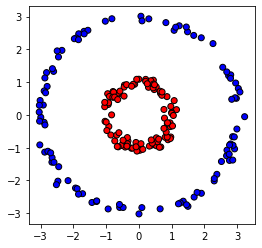

In [46]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr', edgecolors='k')
plt.gca().set_aspect('equal')
plt.show()

In [47]:
def linear_kernel(X, Z):
    return np.dot(X, Z.T)

def poly_kernel(X, Z, p = 3):
    return (1+np.dot(X, Z.T))**p

def rbf_kernel(X, Z, gamma=1.0):
    # ||x-z||^2 = x^2 + z^2 - 2xz
    X_norm = np.sum(X**2, axis=1).reshape(-1,1) #column vector
    Z_norm = np.sum(Z**2, axis=1).reshape(1,-1) #row vector
    dists = X_norm + Z_norm - 2*np.dot(X, Z.T)
    return np.exp(-gamma * dists)

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

K = rbf_kernel(X_train, X_train)
beta = np.zeros(X_train.shape[0])


In [49]:
epochs = 300
alpha = 0.1
lam = 1e-3  # regularization

for _ in range(epochs):
    beta = np.linalg.solve(K + lam*np.eye(len(X_train)), y_train)   


In [50]:
K_test = rbf_kernel(X_test, X_train)
scores = K_test @ beta
y_pred = np.sign(scores)

acc = np.mean(y_pred==y_test)
print(acc)

1.0
